In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

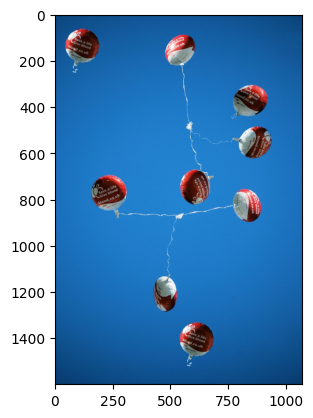

In [9]:
image = cv.imread('images/baloons.jpeg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_copy = image.copy()
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(image)

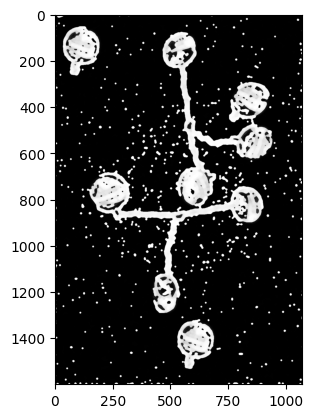

In [10]:
def difference_of_Gaussians(img, k1, s1, k2, s2):
    b1 = cv.GaussianBlur(img,(k1, k1), s1)
    b2 = cv.GaussianBlur(img,(k2, k2), s2)
    return b1 - b2

DoG_img = difference_of_Gaussians(gray, 5, 5, 17, 13)

DoG_img = cv.medianBlur(DoG_img, 5)

#ERODE
kernel = np.ones((5,5),np.uint8)
DoG_img = cv.erode(DoG_img, kernel, iterations = 1)

#DILATE
kernel = np.ones((5,5),np.uint8)
DoG_img = cv.dilate(DoG_img, kernel, iterations = 2)

DoG_img = cv.medianBlur(DoG_img, 9)

hough_copy = DoG_img.copy()

plt.imshow(DoG_img, cmap='gray')